In [1]:
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
import sys
sys.path.insert(0, '../')
from utils import *


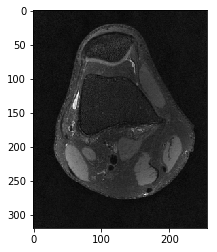

c:\users\jains\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':


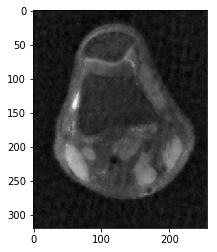

In [2]:
# original vs 6 times subsampled
data = glob("../data/test_img_slices/*.ra")
orig_img = get_image_old2(data[0])
minv = np.min(orig_img[:, :, 0])
maxv = np.max(orig_img[:, :, 0])
orig_img = np.expand_dims(-1 + (2 * (np.array(orig_img[:, :, 0] - minv) / (maxv - minv))), 2)
plt.imshow(orig_img[:, :, 0], cmap='gray')
plt.show()
mask_files = glob("../masks/gen_masks/6_*")
mask_files = [np.fft.fftshift(np.load(m)) for m in mask_files]
mask = mask_files[0]
subs_img = np.fft.ifft2(np.multiply(np.fft.fft2(orig_img[:, :, 0]), mask)).astype(float)
minv = np.min(subs_img)
maxv = np.max(subs_img)
subs_img = np.expand_dims(-1 + (2 * (np.array(subs_img - minv) / (maxv - minv))), 2)
plt.imshow(subs_img[:, :, 0], cmap='gray')
plt.show()

In [3]:
def get_best(name, start, end, compare):
    all_ims = []
    for i in range(start, end + 1):
        all_ims.extend(np.load(name + '{}.npy'.format(i)))
    min_mse, best = np.float('inf'), all_ims[0]
    best_index = 0
    for index in range(1, len(all_ims)):
        img = all_ims[index]
        mse = np.mean(np.square(img[:, :, 0] - compare[:, :, 0]))
        if mse < min_mse:
            #print(mse)
            min_mse = mse
            best = img
            best_index = index
    print(best_index, min_mse)
    return best

In [4]:
#recon_full = np.load('../deep_prior_data/recon_full.npy') # recon full from full (MSE)
best_full = get_best('../deep_prior_data/recon_full', 1, 2, orig_img)
#recon_mixed = np.load('../deep_prior_data/recon_mixed1.npy') # recon full from subsampled (custom)
best_mixed = get_best('../deep_prior_data/recon_mixed', 1, 6, orig_img)
#recon_subsampled = np.load('../deep_prior_data/recon_subsampled.npy') # recon subsampled from subsampled (MSE)
best_subsampled = get_best('../deep_prior_data/recon_subsampled', 1, 2, subs_img)
best_mixed_tv = get_best('../deep_prior_data/recon_mixed_tv', 1, 3, orig_img)

c:\users\jains\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in square
  if __name__ == '__main__':


101 0.0015902842215580637


c:\users\jains\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in subtract
  if __name__ == '__main__':


27 0.008850796408984219
101 0.0006537789885725672
155 0.013756638303608812


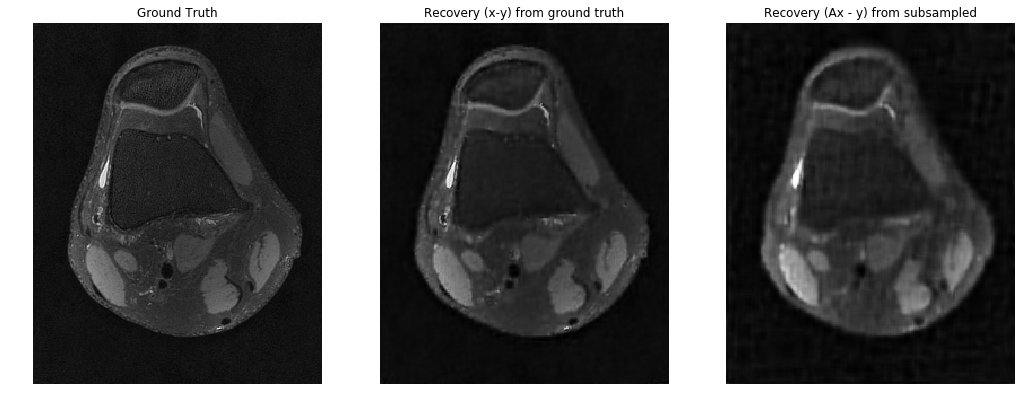

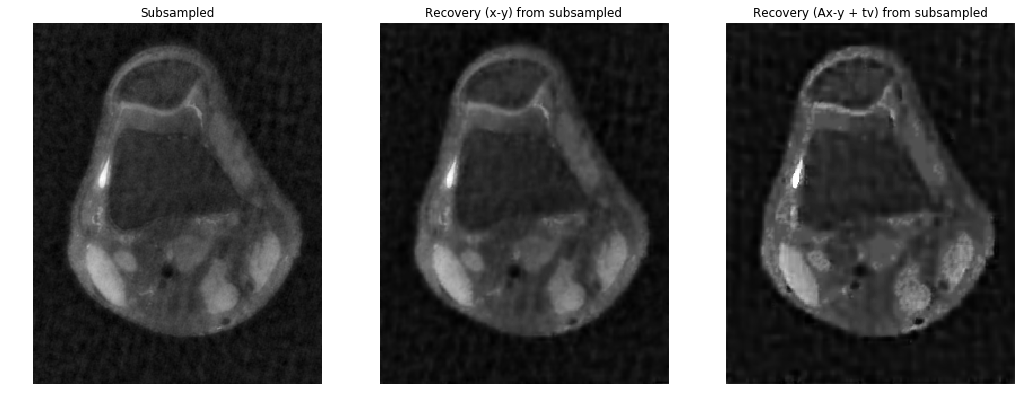

In [5]:
plt.figure(figsize=(30,10))
plt.subplot(151); plt.axis('off'); plt.title('Ground Truth'); plt.imshow(orig_img[:, :, 0], cmap='gray')
plt.subplot(152); plt.axis('off'); plt.title('Recovery (x-y) from ground truth'); plt.imshow(best_full[:, :, 0], cmap='gray')
plt.subplot(153); plt.axis('off'); plt.title('Recovery (Ax - y) from subsampled'); plt.imshow(best_mixed[:, :, 0], cmap='gray')
plt.show()
plt.figure(figsize=(30,10))
plt.subplot(151); plt.axis('off'); plt.title('Subsampled'); plt.imshow(subs_img[:, :, 0], cmap='gray')
plt.subplot(152); plt.axis('off'); plt.title('Recovery (x-y) from subsampled'); plt.imshow(best_subsampled[:, :, 0], cmap='gray')
plt.subplot(153); plt.axis('off'); plt.title('Recovery (Ax-y + tv) from subsampled'); plt.imshow(best_mixed_tv[:, :, 0], cmap='gray')

plt.show()